#### points to go over: all nan values should be set to 0;  set how values would override eachother incase of overlap

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import OneHotEncoder
import time

In [2]:
path = 'Merged-data-4-sec-254-CNN-Label/31_061020m-merged.csv'
eventofinterest = 254

In [3]:
def row_by_row(dataset,first_limit,last_limit,output,row_number):
        if dataset.loc[row_number,('weighted_label')] >= first_limit and dataset.loc[row_number,('weighted_label')] <=last_limit :
            dataset.loc[row_number,('CNN_label')] = output

In [4]:
# this finction changes the names of the columns to something human friendly 
def column_name_fixing(dataframe):
    temp_dict_rename = {}

    for column in range(0,len(dataframe.columns)):
        if column <= 29:
            temp_dict_rename[dataframe.columns[column]] = f'C{column}'
        elif column == 30:
            temp_dict_rename[dataframe.columns[column]] = 'label'
        elif column == 31:
            temp_dict_rename[dataframe.columns[column]] = 'time1'
        elif column == 32:
            temp_dict_rename[dataframe.columns[column]] = 'time2'
        elif column == 33:
            temp_dict_rename[dataframe.columns[column]] = 'time3'
        elif column == 34:
            temp_dict_rename[dataframe.columns[column]] = 'epoch 253'
        elif column == 35:
            temp_dict_rename[dataframe.columns[column]] = 'epoch 254'
        
    dataframe = dataframe.rename(temp_dict_rename,axis=1)
    return dataframe

In [5]:
dataset_generic = pd.read_csv(path,header=None)

In [6]:
dataset_generic = column_name_fixing(dataset_generic)

In [7]:
def overlap_finder(label,row_index,current_index):
    saved_data = {}
    for row_number1 in reversed(range(int(row_index),int(current_index+1))):
        if dataset.loc[row_number1,('weighted_label')] not in [label] and not math.isnan(dataset['weighted_label'][row_number1]):
            break
    return row_number1

In [8]:
def label_calculator(min_range, max_range, label,overlap_index,dataset):
    dataset.loc[overlap_index:max_range,('weighted_label')]=label
    dataset.loc[min_range:overlap_index,('weighted_label')]=(label+dataset['weighted_label'][min_range])/2.0
    

In [9]:
dataset = dataset_generic
# Here, I get the label in relation to the index;  I look n seconds backwards; while forward until epoch 253. 
total_overlap = 0
time_looking_back = 20

number_of_events = dataset['time1'].shape[0]-sum(dataset['time1'].isnull())

for event_number in range(0,number_of_events):
    instance_overlap = 0
    
    current_index = dataset['time1'][event_number]*500
    epoch_253_index = dataset['epoch 253'][event_number]*500
    epoch_254_index = dataset['epoch 254'][event_number]*500
    row_bottom = current_index-(500*time_looking_back)
    
    if row_bottom < 0:
        row_bottom = 0
        
    if event_number > 0:
        
        if(eventofinterest==253):
            if dataset['label'][event_number] == 1.0:
                if (dataset.loc[row_bottom:current_index,('weighted_label')]>1.0).any():
                    total_overlap += 1
                    instance_overlap +=1
                    row_overlap = overlap_finder(1.0,row_bottom,current_index)
                    label_calculator(int(row_bottom),int(epoch_253_index),1.0,int(row_overlap),dataset)

            elif dataset['label'][event_number] == 2.0:
                if (dataset.loc[row_bottom:current_index,('weighted_label')]>2.0).any() and (dataset.loc[row_bottom:current_index,('weighted_label')]<2.0).any():
                    total_overlap += 1
                    instance_overlap +=1
                    row_overlap = overlap_finder(2.0,row_bottom,current_index)
                    label_calculator(int(row_bottom),int(epoch_253_index),2.0,int(row_overlap),dataset)

            elif dataset['label'][event_number] == 3.0:
                if (dataset.loc[row_bottom:current_index,('weighted_label')]<3.0).any():
                    total_overlap += 1
                    instance_overlap +=1
                    row_overlap = overlap_finder(3.0,row_bottom,current_index)
                    label_calculator(int(row_bottom),int(epoch_253_index),3.0,int(row_overlap),dataset)

        elif(eventofinterest==254):
            if dataset['label'][event_number] == 1.0:
                if (dataset.loc[row_bottom:current_index,('weighted_label')]>1.0).any():
                    total_overlap += 1
                    instance_overlap +=1
                    row_overlap = overlap_finder(1.0,row_bottom,current_index)
                    label_calculator(int(row_bottom),int(epoch_254_index),1.0,int(row_overlap),dataset)

            elif dataset['label'][event_number] == 2.0:
                if (dataset.loc[row_bottom:current_index,('weighted_label')]>2.0).any() and (dataset.loc[row_bottom:current_index,('weighted_label')]<2.0).any():
                    total_overlap += 1
                    instance_overlap +=1
                    row_overlap = overlap_finder(2.0,row_bottom,current_index)
                    label_calculator(int(row_bottom),int(epoch_254_index),2.0,int(row_overlap),dataset)

            elif dataset['label'][event_number] == 3.0:
                if (dataset.loc[row_bottom:current_index,('weighted_label')]<3.0).any():
                    total_overlap += 1
                    instance_overlap +=1
                    row_overlap = overlap_finder(3.0,row_bottom,current_index)
                    label_calculator(int(row_bottom),int(epoch_254_index),3.0,int(row_overlap),dataset)
    
    if instance_overlap == 0:
        if eventofinterest == 253:
            dataset.loc[row_bottom:epoch_253_index,('weighted_label')] = dataset['label'][event_number]
        
        elif eventofinterest == 254:
            dataset.loc[row_bottom:epoch_254_index,('weighted_label')] = dataset['label'][event_number]

            
            
            
            
# transforming NaN into 0            
sum_ = sum(dataset['weighted_label'].isnull())
dataset['weighted_label'] = dataset['weighted_label'].fillna(0)                        
print(f'0 values:{sum_}')
print(f'total_overlap: {total_overlap}')

0 values:29387
total_overlap: 162


In [10]:
dataset['CNN_label'] = 0

make decimal limit based on step number; in order to reduce error

In [11]:
def float_list_creation(initial_number,ending_number,step_number,decimal_limit):
    
    if type(initial_number) != float or type(ending_number) != float or type(step_number) != float:
        raise ValueError('must only provide floats as inputs')
                
    else:
        list_of_floats = []
        
        list_of_floats.append(round(initial_number,2))
        while initial_number < ending_number:
            #print('entered loop')
            list_of_floats.append(round(initial_number+step_number,decimal_limit))
            initial_number = initial_number+step_number
        print('list done')
    return list_of_floats

Should add inplace = true

problems:
how to input the list of floats in a good way: make it linked with function above

In [12]:
# function to apply reshape and split data-reshaping in an efficient manner to 
#avoid RAM overflow:
def split_and_reshape(dataframe,floats_to_replace,replacing_value,Save_changes=False):
    division_number = 2
    
    lower_end_row = 0
    upper_end_row = 0
    if dataframe.shape[0] % 2 == 0:
        range_number_data = int(dataset.shape[0]/division_number)

        for i in range(0,division_number): 
            upper_end_row += range_number_data
            dataframe[lower_end_row:upper_end_row].replace(floats_to_replace,replacing_value,inplace=Save_changes)
            lower_end_row += range_number_data

        # perform normal division ;  4 times instead of 2
        # apply replace function
    elif dataframe.shape[0] % 2 != 0:
        print('entered odd number loop')
        range_number_data = int((dataset.shape[0]-1)/division_number)

        for i in range(0,division_number): 
            if i != division_number-1:
                print(f'entered paired division {upper_end_row},'
                      f'division number is {division_number}'
                      f'i is {i}')

                upper_end_row += range_number_data
                dataframe[lower_end_row:upper_end_row].replace(floats_to_replace,replacing_value,inplace=Save_changes)
                lower_end_row += range_number_data
            elif i == division_number-1:
                print(f'entered odd division {upper_end_row+1}'
                      f'division number is {division_number}'
                      f'i is {i}')
                upper_end_row += range_number_data+1
                print(f'upper end row {upper_end_row}, while lower end row {lower_end_row}') 
                dataframe[lower_end_row:upper_end_row].replace(floats_to_replace,replacing_value,inplace=Save_changes)
                lower_end_row += range_number_data

            # taking care of the odd element
            

In [ ]:
# test that odd part of the split and reshape function works:

dataset_test = dataset.drop(dataset.index[[dataset.shape[0]-1]],axis=0)

list_temp = float_list_creation(2.50,3.00,0.0001,4)

init_time = time.time()
split_and_reshape(dataset_test['weighted_label'],list_temp,3,Save_changes=False)
end_time = time.time()
print(end_time-init_time)

In [ ]:
(dataset_test['weighted_label'].shape[0])

<AxesSubplot:xlabel='weighted_label', ylabel='Count'>

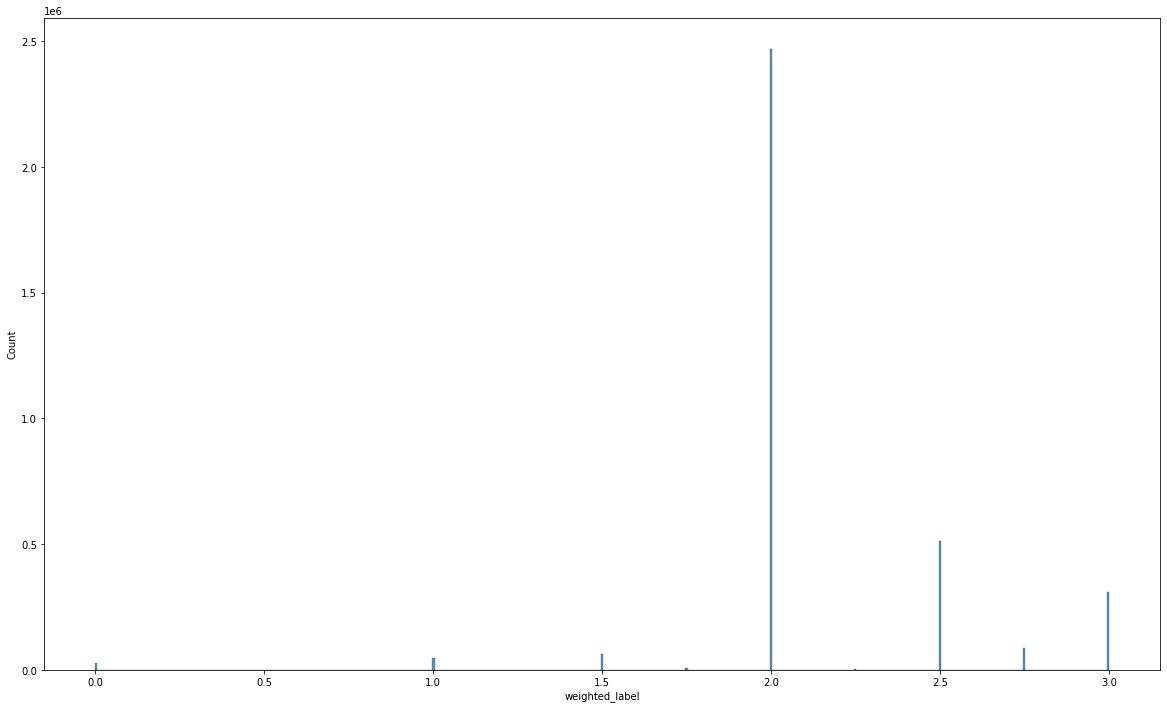

In [13]:
plt.figure(figsize=(20, 12))
sns.histplot(dataset['weighted_label'])

In [14]:
# here I apply the functions created above to adopt a rapid column creation
# Sometimes values in lists below end with 98 instead of 99 because for some reason 
# the list contains +1 element (not always; hence only some lists are set to n-1)

init_time = time.time()

list_3_1 = float_list_creation(2.0000,2.4999,0.0001,4)
split_and_reshape(dataset['weighted_label'],list_3_1,3,Save_changes=True)
list_3_2 = float_list_creation(2.5000,3.0000,0.0001,4)
split_and_reshape(dataset['weighted_label'],list_3_2,3,Save_changes=True)

list_2 = float_list_creation(1.5000,1.9998,0.0001,4)
split_and_reshape(dataset['weighted_label'],list_2,2,Save_changes=True)

list_1 = float_list_creation(1.0000,1.4998,0.0001,4)
split_and_reshape(dataset['weighted_label'],list_1,1,Save_changes=True)


list_4_1 = float_list_creation(0.0000,0.4998,0.0001,4)
split_and_reshape(dataset['weighted_label'],list_4_1,0,Save_changes=True)
list_4_2 = float_list_creation(0.5000,0.9998,0.0001,4)
split_and_reshape(dataset['weighted_label'],list_4_2,0,Save_changes=True)


end_time = time.time()
print(end_time-init_time)

list done
list done
list done
list done
list done
list done
83.16814088821411


<AxesSubplot:xlabel='weighted_label', ylabel='Count'>

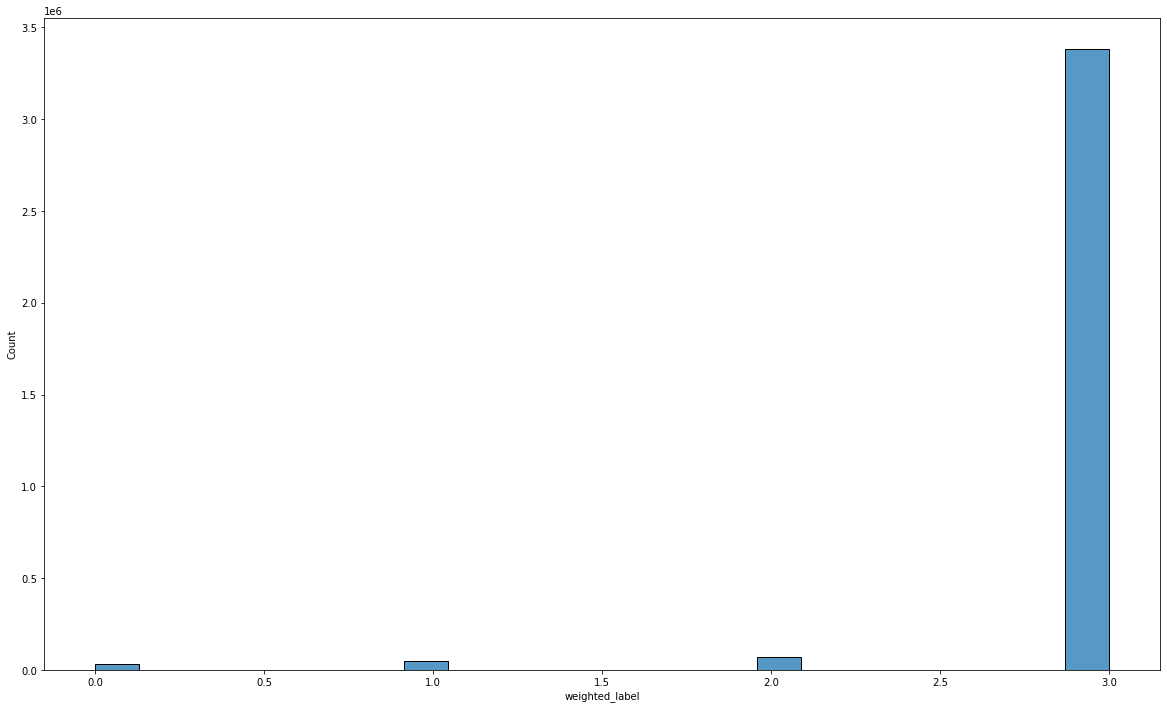

In [15]:
plt.figure(figsize=(20, 12))
sns.histplot(dataset['weighted_label'])

### Old Algorithm

In [ ]:
init_time = time.time()
for row_number in range(0,dataset.shape[0]):
    row_by_row(dataset,1.0,1.49,1,row_number)
    row_by_row(dataset,1.5,1.99,2,row_number)
    row_by_row(dataset,2.0,3.0,3,row_number)
    row_by_row(dataset,0.0,0.99,0,row_number)
end_time = time.time()
print(end_time-init_time)

In [ ]:
plt.figure(figsize=(20, 12))
sns.histplot(dataset['CNN_label'])

In [ ]:
dataset.drop(['label','time1','time2','time3','epoch 253','epoch 254'],axis = 1, inplace = True)

In [ ]:
possible_outputs = np.array([0.0, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0])

In [ ]:
ohe = OneHotEncoder()
one_hot = ohe.fit_transform(possible_outputs.reshape(-1,1)).toarray()
print(one_hot)
